## Project No1 - The Mind
### Author: Max Medina

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k,replacement = False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=replacement)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[16, 24, 40],
       [ 5, 71, 98],
       [ 4, 52, 70],
       [ 1, 79, 83],
       [ 7, 13, 69],
       [28, 36, 67]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([16, 24, 40]), array([ 5, 71, 98]))

The lowest card in the game is

In [5]:
np.min(cards)

1

In [6]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

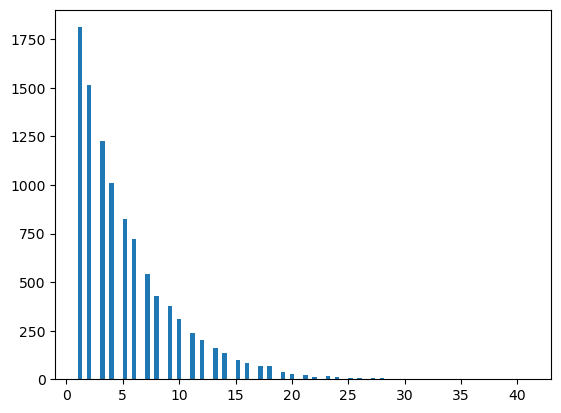

In [7]:
def min_dist(n,k,N=100,replacement=False):
    return [np.min(sample_cards(N, n, k,replacement=replacement)) for _ in range(0,10000)]

min_list = min_dist(3,6)
plt.hist(min_list,bins=100)
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

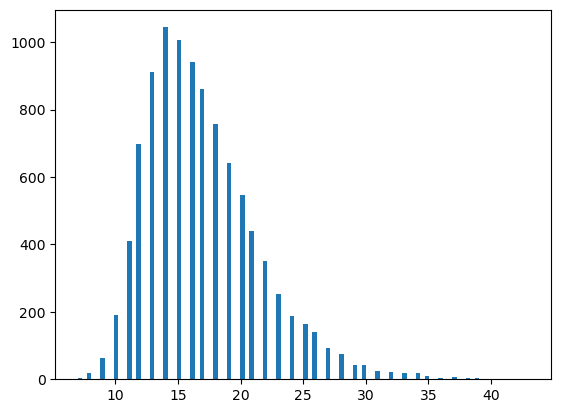

In [8]:
def largest_difference(n,k,N=100):
    largest_list = [
    np.diff(np.sort(sample_cards(N, n, k).flatten())).max() 
    for _ in range(0,10000)
    ]
    return largest_list
largest_list = largest_difference(6,3)
plt.hist(largest_list,bins=100)
plt.show()

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

In [9]:
import pandas as pd

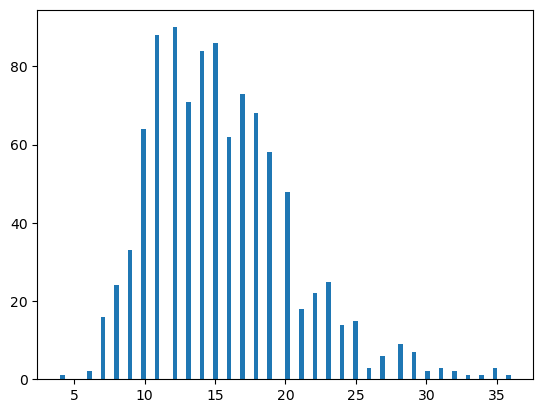

In [10]:
def largest_difference_different_players(n,k,N=100):
    experiments = [
        pd.DataFrame(
            {'cards':np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False),
             'player': np.repeat([i for i in range(1,k+1)],n)
            }).sort_values('cards')\
            .diff()\
            .query('player!=0')['cards']\
            .max()
        for _ in range(0,1000)
    ]
    return experiments

experiments = largest_difference_different_players(6,3)
plt.hist(experiments,bins=100)
plt.show(experiments)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

In [11]:
import seaborn as sns

3 9
5 9
7 9


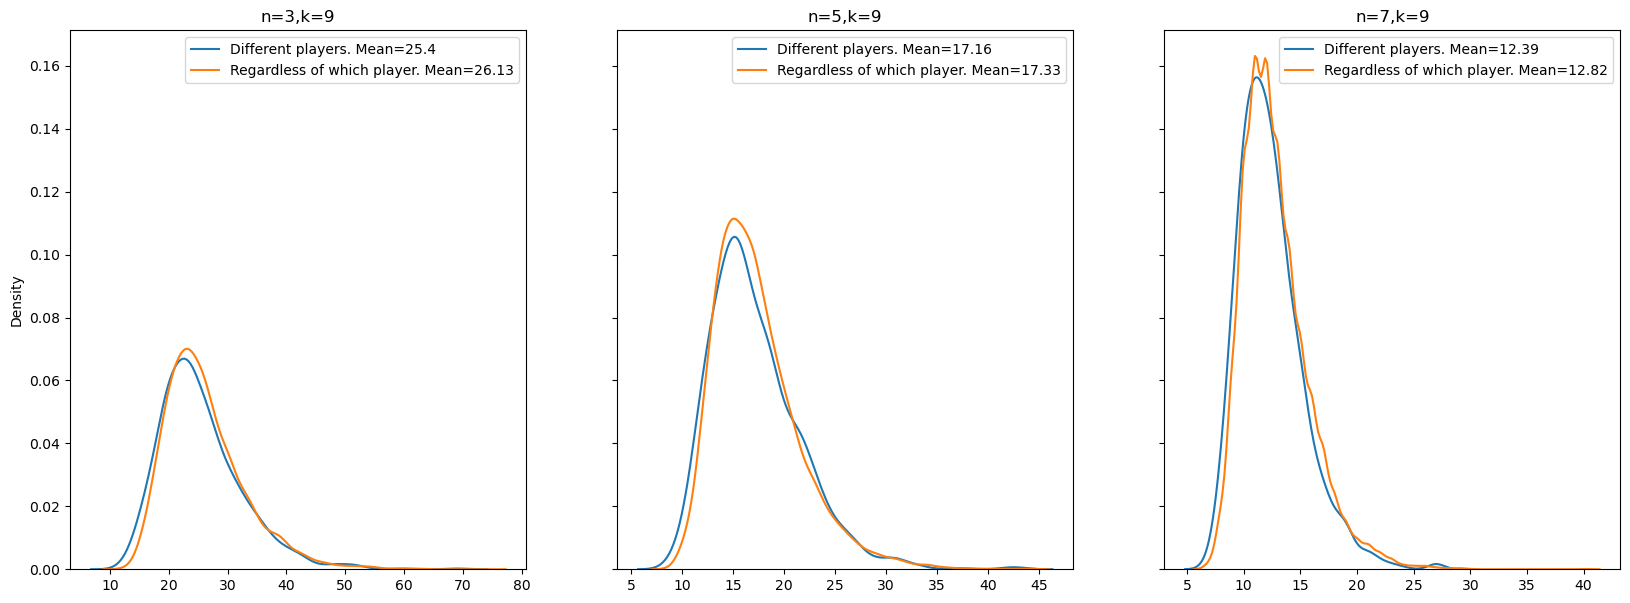

In [12]:
fig,ax = plt.subplots(1,3,figsize=(20,7),sharey=True)
k = 9
N = 200
for n in [3,5,7]:
    print(n,k)
    experiment1 = largest_difference_different_players(n,k,N)
    experiment2 = largest_difference(n,k,N)
    sns.kdeplot(experiment1,label=f'Different players. Mean={round(np.mean(experiment1),2)}',ax=ax[(n-1)//3])
    sns.kdeplot(experiment2,label=f'Regardless of which player. Mean={round(np.mean(experiment2),2)}',ax=ax[(n-1)//3])
    ax[(n-1)//3].set_title(f'n={n},k={k}')
    ax[(n-1)//3].legend()
plt.show(experiments)

3 3
3 5
3 7


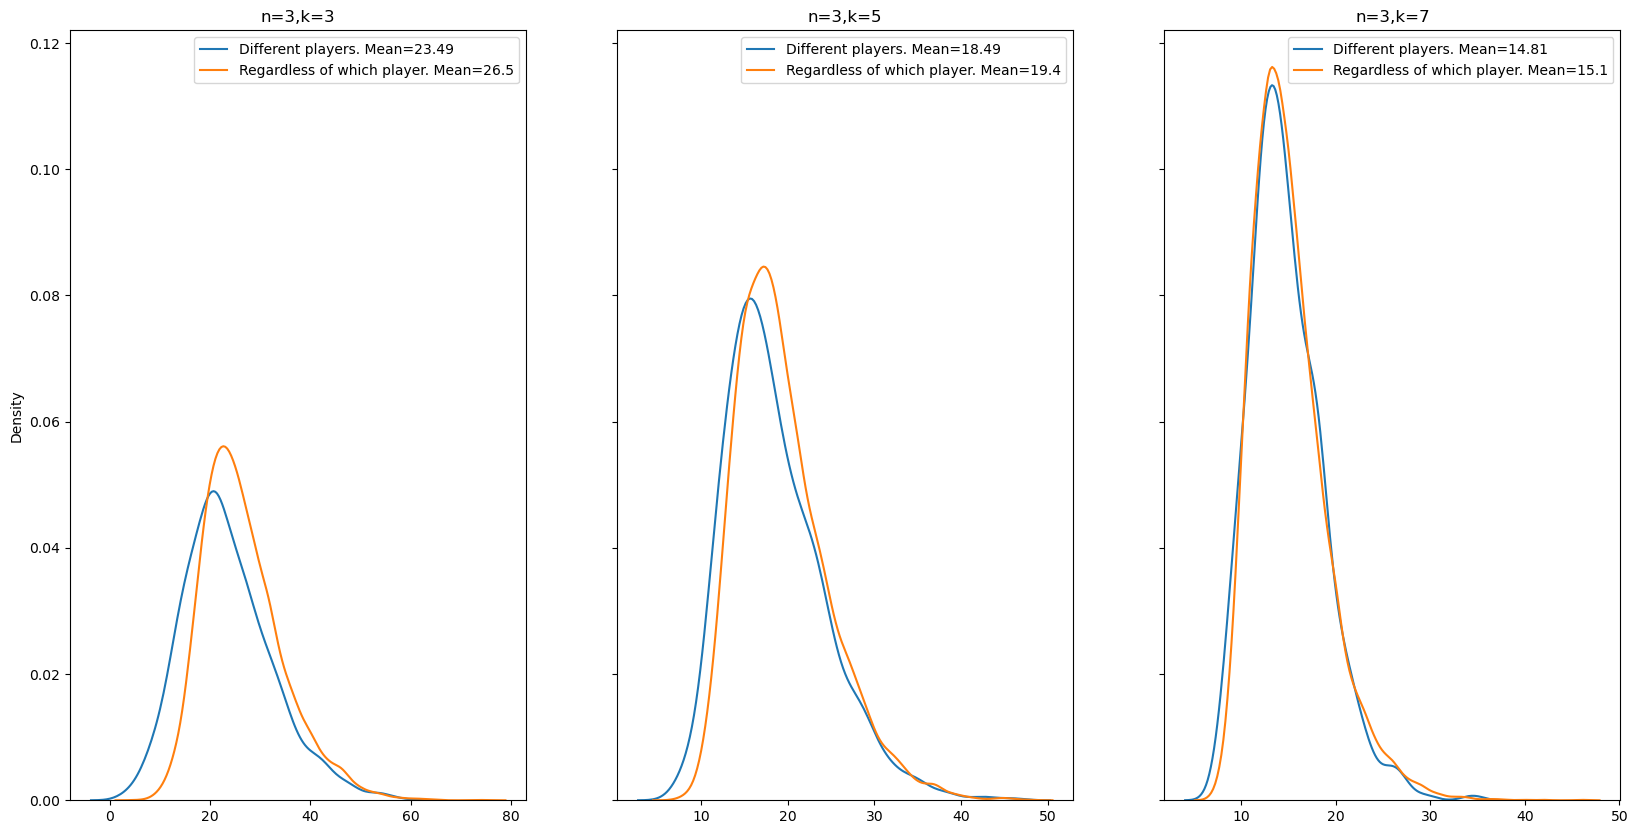

In [13]:
fig,ax = plt.subplots(1,3,figsize=(20,10),sharey=True)
n = 3
for k in [3,5,7]:
    print(n,k)
    experiment1 = largest_difference_different_players(n,k)
    experiment2 = largest_difference(n,k)
    sns.kdeplot(experiment1,label=f'Different players. Mean={round(np.mean(experiment1),2)}',ax=ax[(k-1)//3])
    sns.kdeplot(experiment2,label=f'Regardless of which player. Mean={round(np.mean(experiment2),2)}',ax=ax[(k-1)//3])
    ax[(k-1)//3].set_title(f'n={n},k={k}')
    ax[(k-1)//3].legend()
plt.show(experiments)

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

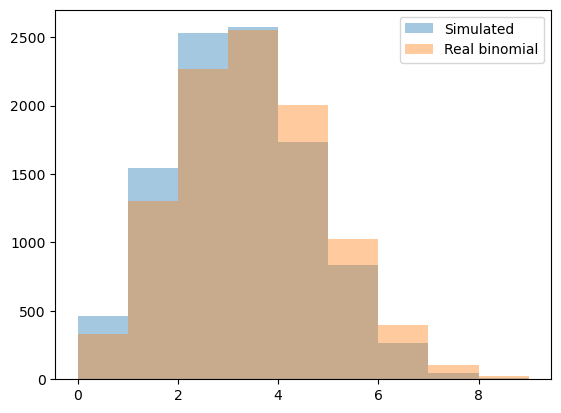

In [29]:
n = 4
game_results = []
for _ in range(0,10000):
    round_results = []
    for k in range(1,12):
        # deal k cards per round
        cards = sample_cards(200,n,k)
        # select one card at random from the minimum of each player
        played_card = np.random.choice(a=cards.min(axis=1), size=1, replace=False)
        actual_min = cards.min()
        # check if the card played is the actual minumum
        round_results.append(1 if played_card==actual_min else 0)
    game_results.append(sum(round_results))
plt.hist(game_results,label = 'Simulated',alpha=0.4,bins=9)
plt.hist(np.random.binomial(12,1/n,10000),label='Real binomial',alpha=0.4,bins=9)
plt.legend()
plt.show()

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

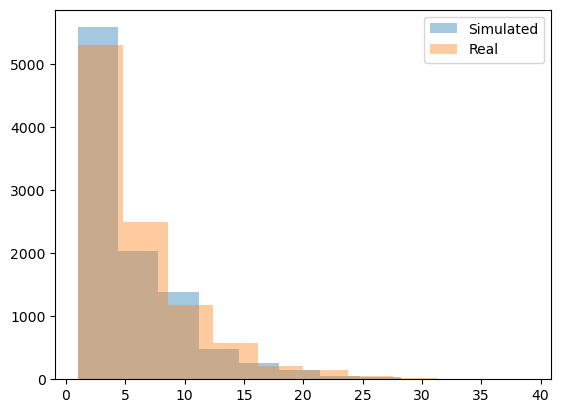

In [15]:
# simulate min card distribution
n = 6
k = 3
min_list = min_dist(n,k)
# simulate 1st order statistic as Beta(1,n)
betas = np.random.beta(a=1, b = n*k, size = 10000)
# multipy by 100 and apply ceiling fn to get uniform btw [1,100]
real_uniform = np.ceil(100*betas)
plt.hist(min_list,label='Simulated',alpha=0.4)
plt.hist(real_uniform,label = 'Real',alpha = 0.4)
plt.legend()
plt.show()

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

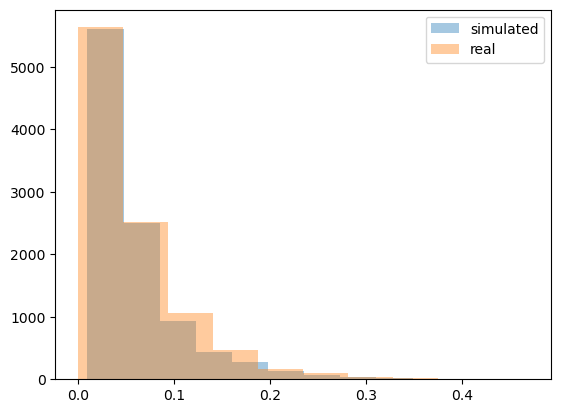

In [16]:
N = 100
n=3
k=6
min_list = min_dist(n,k,N)
plt.hist(-np.log(1-np.array(min_list)/N), label = 'simulated', alpha = 0.4)
plt.hist(np.random.exponential(scale = 1/(n*k),size=10000), label='real',alpha=0.4)
plt.legend()
plt.show()

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

#### Replacement vs no-replacement
Drawing with replacement leads to independent events. On the other hand, the distribution of the 1st order statistic assumes iid random variables. Thus, we expect the empirical distribution of the minumum in our game simulations to approximate much closer the actual distributions sampled above. 

We repeat the histograms above and conclude that independence makes the approximation better.

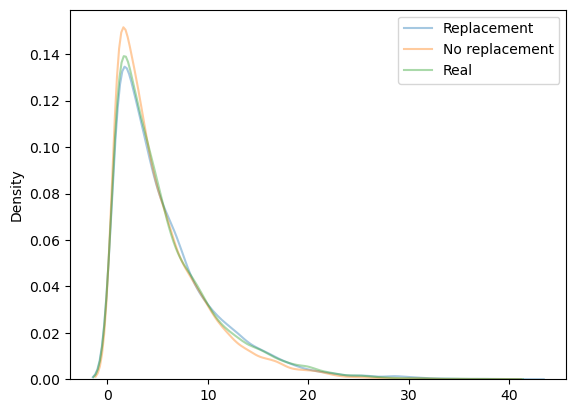

In [17]:
N=100
n=3
k=6
min_rep = min_dist(n,k,N=N,replacement=True)
min_no_rep = min_dist(n,k,N=N,replacement=False)
sns.kdeplot(min_rep,label='Replacement',alpha=0.4)
sns.kdeplot(min_no_rep,label='No replacement',alpha=0.4)
sns.kdeplot(real_uniform,label = 'Real',alpha = 0.4)
plt.legend()
plt.show()

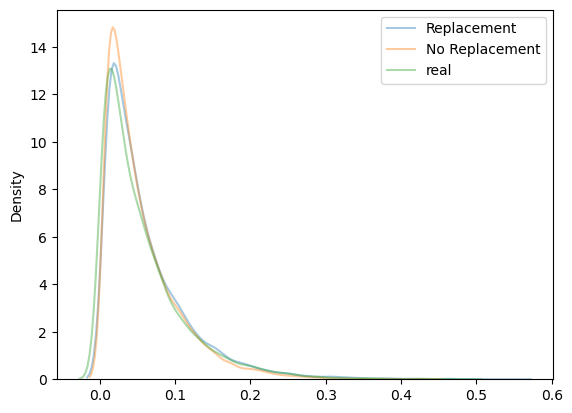

In [18]:
N=100
n=3
k=6
min_rep = min_dist(n,k,N=N,replacement=True)
min_no_rep = min_dist(n,k,N=N,replacement=False)
sns.kdeplot(-np.log(1-np.array(min_rep)/N), label = 'Replacement', alpha = 0.4)
sns.kdeplot(-np.log(1-np.array(min_no_rep)/N), label = 'No Replacement', alpha = 0.4)
sns.kdeplot(np.random.exponential(scale = 1/(n*k),size=10000), label='real',alpha=0.4)
plt.legend()
plt.show()

#### $n*k <<< N$
The inuition tells us that when the number of cards dealt is much smaller than the total number, then the sampling is approximately. Think of $N=+\infty$, then obviously each card sampled is independent of the other. Therefore, we expect our approximations to improve as $N$ gets really large.

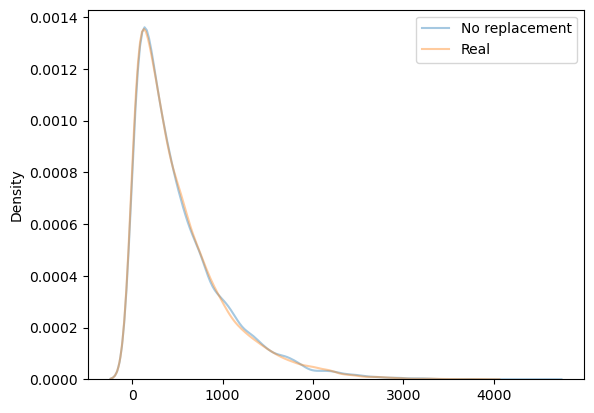

In [19]:
N=10000
n=3
k=6
betas = np.random.beta(a=1, b = n*k, size = 10000)
# multipy by N and apply ceiling fn to get uniform btw [1,100]
real_uniform = np.ceil(N*betas)
min_no_rep = min_dist(n,k,N=N,replacement=False)
sns.kdeplot(min_no_rep,label='No replacement',alpha=0.4)
sns.kdeplot(real_uniform,label = 'Real',alpha = 0.4)
plt.legend()
plt.show()

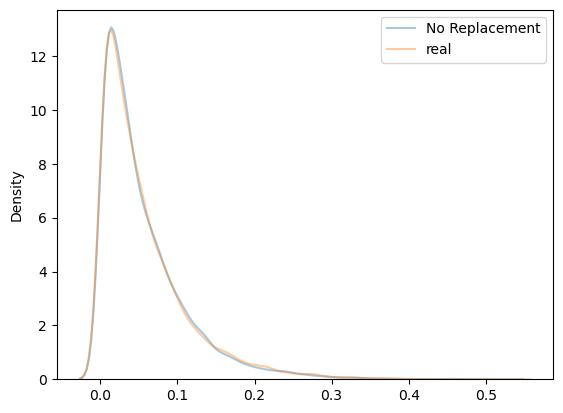

In [20]:
N=10000
n=3
k=6
min_no_rep = min_dist(n,k,N=N,replacement=False)
sns.kdeplot(-np.log(1-np.array(min_no_rep)/N), label = 'No Replacement', alpha = 0.4)
sns.kdeplot(np.random.exponential(scale = 1/(n*k),size=10000), label='real',alpha=0.4)
plt.legend()
plt.show()

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Max Medina
- Member No2: Isabel Moreno
- Member No3: Frederik Stihler